In [1]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import h5py 
%matplotlib inline 


In [2]:
def SSA_modes(F, L): 
    N = len(F) 
    K = N - L + 1
    X = np.empty((L, K)) 
    X = np.array([np.arange(K)+i for i in range(L)])
    X = F[X]
    S = np.dot(X, X.T)      
    U, A, _ = np.linalg.svd(S) 
    V = np.dot(X.T, U)
    return A,U, V


In [3]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд 
A, U, V= SSA_modes(ts, 3) # его разложение с длиной окна = 3 
print(A) # собственные числа 
print(U) # собственные вектора
print(V)# траекторные вектора 

[129.66842566  12.           3.33157434]
[[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  4.14039445e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
[[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  8.88178420e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  8.88178420e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [4]:
def  SSA_group(A, U, V, N, I): 
    L = len(A)
    K = N - L + 1 
    V = V.transpose() 
    Z = np.dot(U[:, I], V[I, :]) 
    G = np.zeros(N)
    L1 = min(L,K)
    K1 = max(L,K)
    for k in range(len(G)):
        z = 0
        if (0 <= k < (L1 - 1)):

            for m in range(0,k+1):
                z = z + Z[m][k-m]
            G[k] = (1/(k+1))*z
            
        elif ((L1 - 1 )<= k < K1):
            for m in range(0, L1):
                z = z + Z[m][k-m]
            G[k] = (1/L1)*z
            
        elif (K1 <= k < (N + 1)):
            for m in range((k-K1 + 1), (N-K1+1)):
                z += Z[m][k-m]
            G[k] = (1/(N - k))*z
    return G       

In [5]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2]) 
print(ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


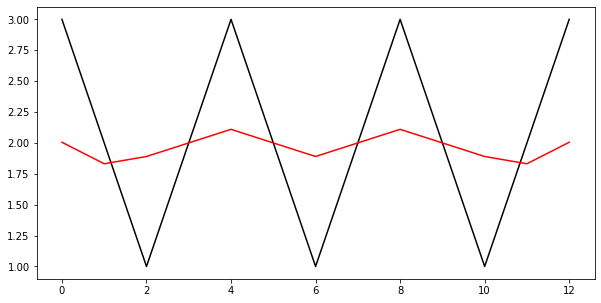

In [6]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [0]), 'r')

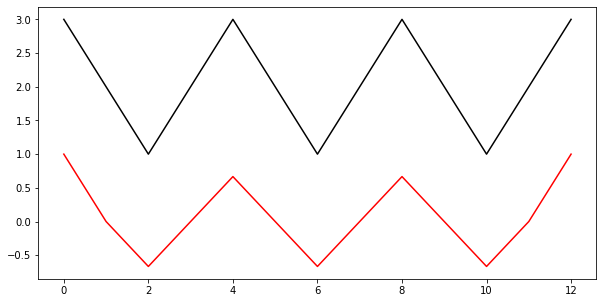

In [7]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [1]), 'r')

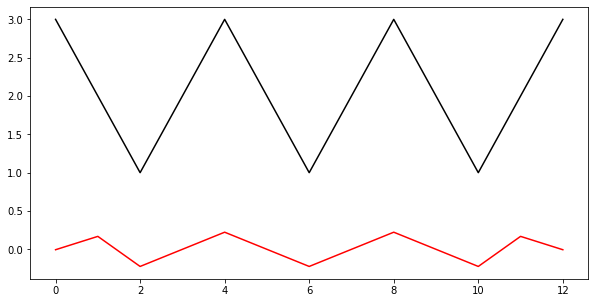

In [8]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [2]), 'r')

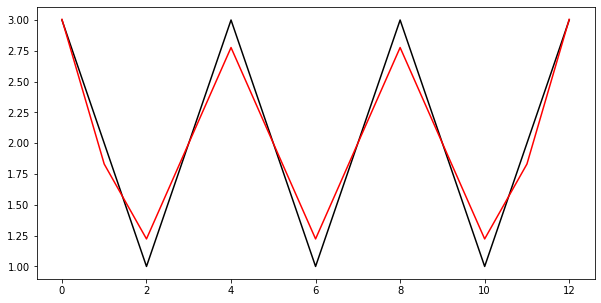

In [9]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [0,1]), 'r')

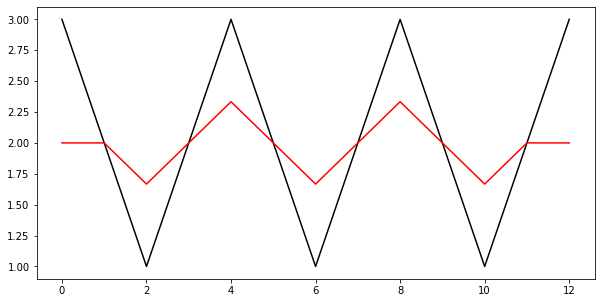

In [10]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [0,2]), 'r')

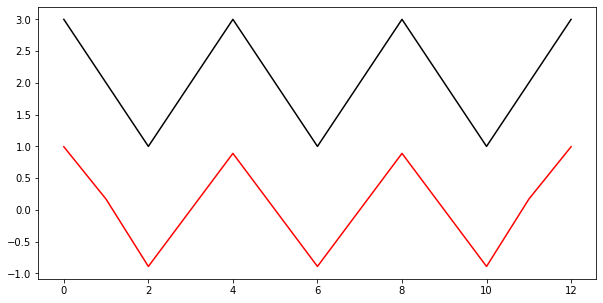

In [11]:
plt.figure(figsize = (10, 5)) 
plt.plot(ts, 'k') 
plt.plot(SSA_group(A, U, V, len(ts), [1,2]), 'r')

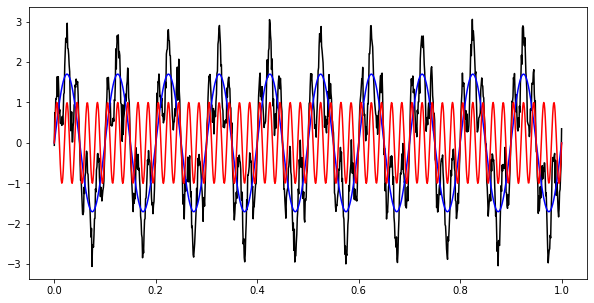

In [12]:
t = np.linspace(0, 1, 1024) 
f1 = 10 
f2 = 50 
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b') 
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') 
plt.show()

In [13]:
A, U, V= SSA_modes(F, 30)

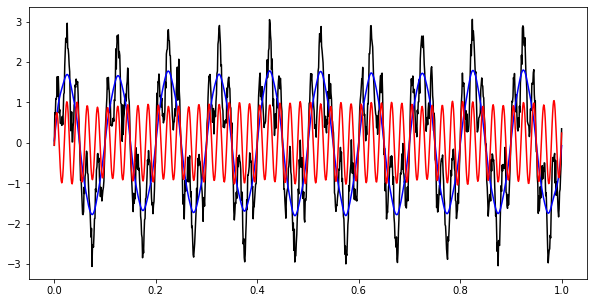

In [14]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t,SSA_group(A, U, V, len(F), [0,1]), 'b')
plt.plot(t,SSA_group(A, U, V, len(F), [2,3]), 'r')
plt.show()
plt.show()

In [15]:
t = np.linspace(0,4,4096) 
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

In [16]:
A, U, V= SSA_modes(F, 2000)

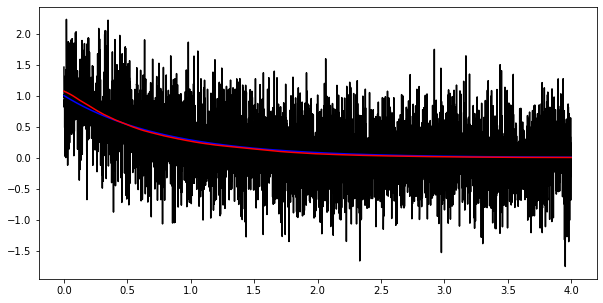

In [17]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, np.exp(-0.4*np.pi*t), 'b') 
plt.plot(t,SSA_group(A, U, V, len(F), [0]), 'r')
plt.show()

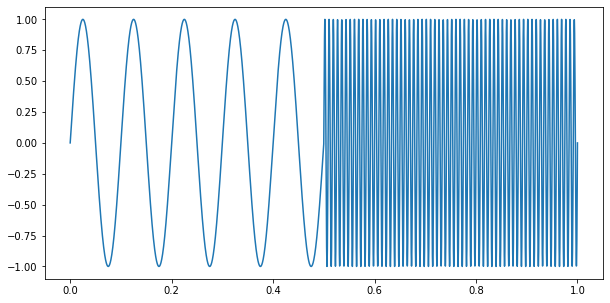

In [18]:
t = np.linspace(0, 1, 4096) 
x2 = np.zeros(4096) 
for i in range(0, len(t)//2): 
    x2[i] = np.sin(2*np.pi*10*t[i])     
for i in range(len(t)//2, len(t)): 
    x2[i] = np.sin(2*np.pi*120*t[i]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, x2) 
plt.show()

In [19]:
A, U, V= SSA_modes(x2, 32)

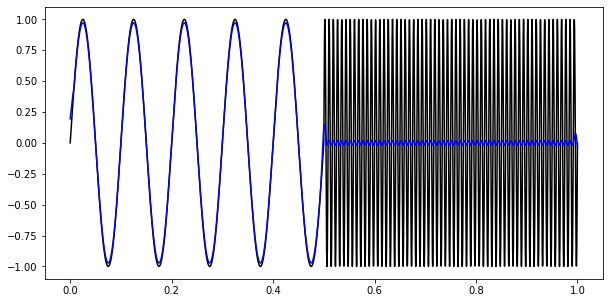

In [20]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, x2, 'k') 
plt.plot(t,SSA_group(A, U, V, len(x2), [0]), 'b')
plt.show()

In [21]:
A, U, V= SSA_modes(x2, 35)

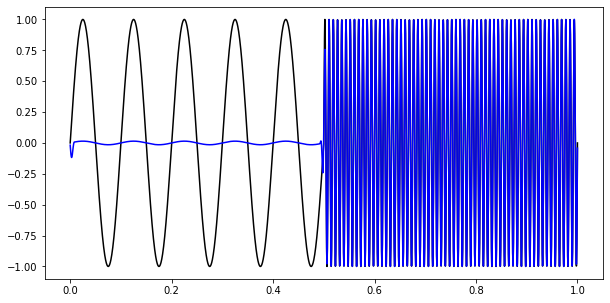

In [22]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, x2, 'k') 
plt.plot(t,SSA_group(A, U, V, len(x2), [1,2]), 'b')
plt.show()

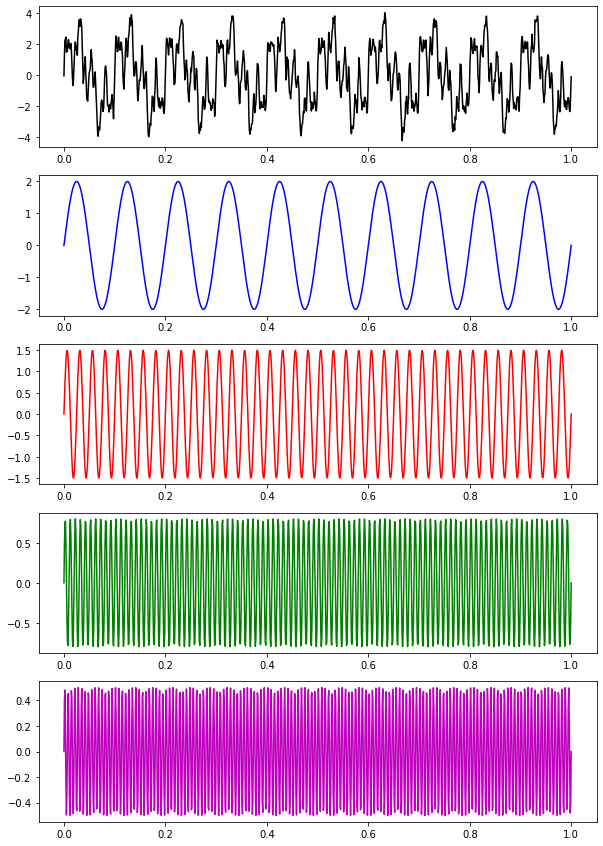

In [23]:
t = np.linspace(0,1,1024) 
f1 = 10 
f2 = 40 
f3 = 100 
f4 = 150 
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t) +0.8*np.sin(2*np.pi*f3*t) +0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15)) 
plt.subplot(5,1,1) 
plt.plot(t, F, 'k') 
plt.subplot(5,1,2) 
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b') 
plt.subplot(5,1,3) 
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r') 
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5) 
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm') 
plt.show() 
 
 

In [24]:
A, U, V = SSA_modes(F, 200)

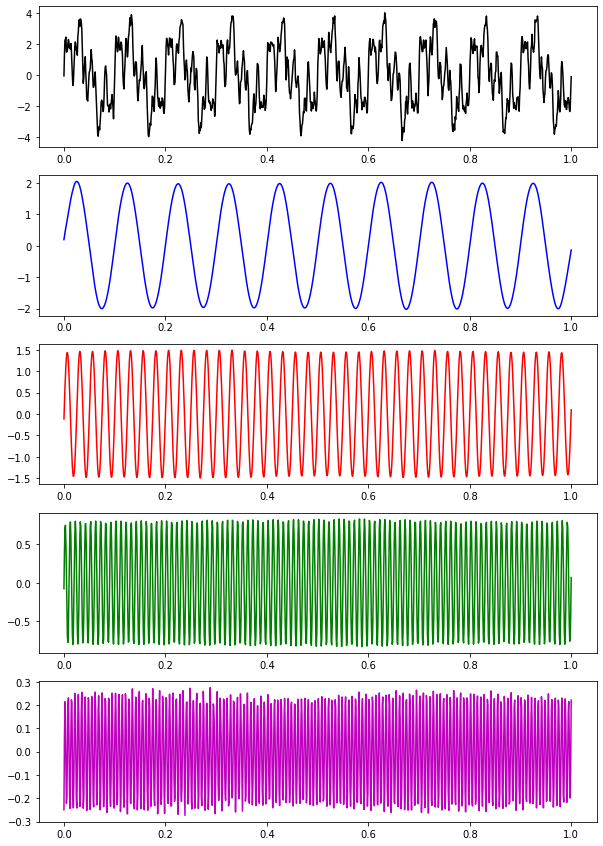

In [25]:
plt.figure(figsize = (10, 15)) 
plt.subplot(5,1,1) 
plt.plot(t, F, 'k') 
plt.subplot(5,1,2) 
plt.plot(t, SSA_group(A, U, V, len(F), [0,1]), 'b') 
plt.subplot(5,1,3) 
plt.plot(t, SSA_group(A, U, V, len(F), [2,3]), 'r') 
plt.subplot(5,1,4)
plt.plot(t, SSA_group(A, U, V, len(F), [4,5]), 'g')
plt.subplot(5,1,5) 
plt.plot(t,SSA_group(A, U, V, len(F), [7,8]), 'm') 
plt.show() 
 

In [26]:
def  SSA_R(A, U, V, N, I, G, M): 
    L = len(A)
    vu = np.linalg.norm(U[-1, I]) 
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1) 
    R = R / (1 - vu * vu)
    Q = np.zeros(N+M)
    for i in range(0,N):
          Q[i] =  G[i] 
    for i in range(N,N+M):
        for j in range(0, L-1):
            Q[i] += R[j] * Q[i-j-1]
    
    return Q  

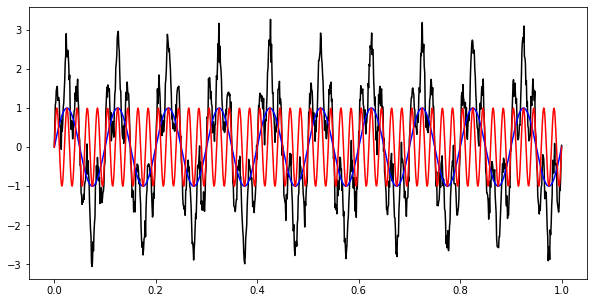

In [27]:
t = np.linspace(0, 1, 1024) 
f1 = 10 
f2 = 50 
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t)) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, np.sin(2*np.pi*f1*t), 'b') 
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') 
plt.show()

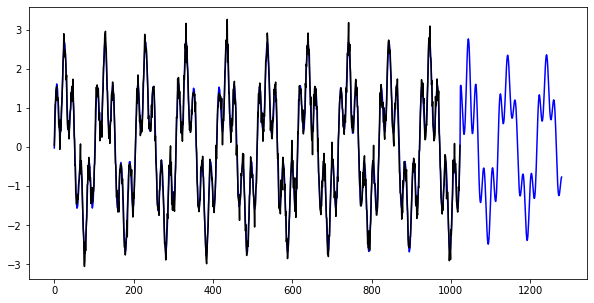

In [28]:
A, U, V = SSA_modes(F, 200)
I = [0,1,2,3,4,5,6]
G = SSA_group(A, U, V, len(F), I)
Q = SSA_R(A, U, V, len(G), I, G, 256)
plt.figure(figsize = (10, 5)) 
plt.plot(Q, 'b')
plt.plot(F, 'k')

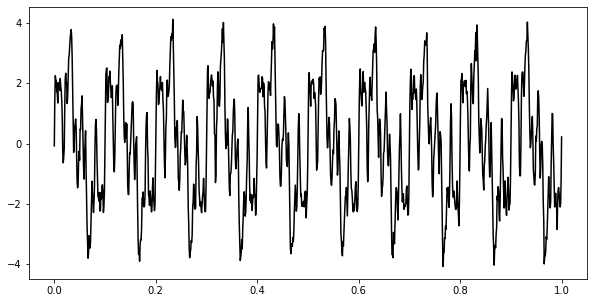

In [29]:
t = np.linspace(0,1,1024) 
f1 = 10 
f2 = 40 
f3 = 100 
f4 = 150 
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t) +0.8*np.sin(2*np.pi*f3*t) +0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.show() 
 

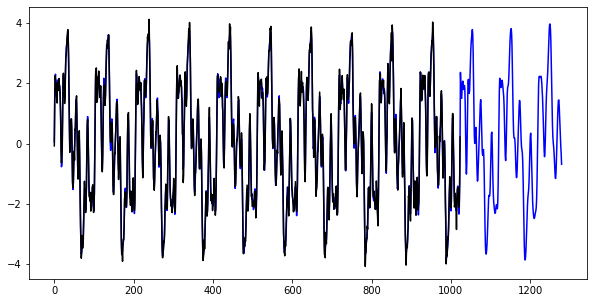

In [30]:
A, U, V = SSA_modes(F, 100)
I = [0,1,2,3,4,5,6,7]
G = SSA_group(A, U, V, len(F), I)
Q = SSA_R(A, U, V, len(G), I, G, 256)
plt.figure(figsize = (10, 5)) 
plt.plot(Q, 'b')
plt.plot(F, 'k')

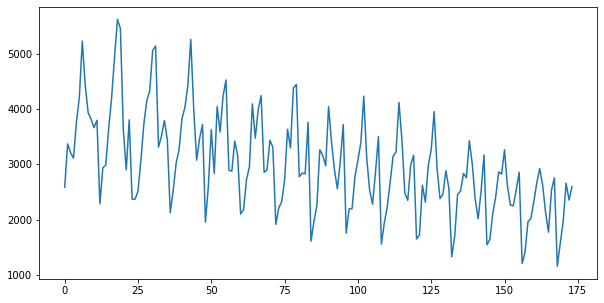

In [31]:
file = h5py.File('Fort.mat','r') 
data = file.get('Fort') 
fort = np.array(data) 
F = np.ravel(fort) 
plt.figure(figsize = (10, 5)) 
plt.plot(F) 
plt.show() 

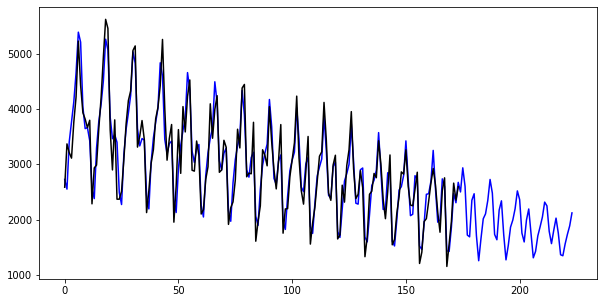

In [32]:
A, U, V = SSA_modes(F, 85)
I = [0,1,2,3,4,5,6,7]
G = SSA_group(A, U, V, len(F), I)
Q = SSA_R(A, U, V, len(G), I, G, 50)
plt.figure(figsize = (10, 5)) 
plt.plot(Q, 'b')
plt.plot(F, 'k')

In [35]:
def  SSA_stoh(F, L, M): 
    m = 1
    I = [0, 1,2,3]
    while m <= M+1:
            F_new = np.append(F, np.random.choice(F))
            F_past = np.inf
            while abs(F_new[-1] - F_past) > 10:
                A, U, V = SSA_modes(F_new, L)
                Q = SSA_group(A, U, V, len(F_new), I)
                F_past = F_new[-1]
                F_new[-1] = Q[-1]
                m += 1 
            F=F_new
    return F

In [45]:
F1 = F[:-24]
# plt.figure(figsize = (10, 5)) 
# plt.plot(F1) 
# plt.show() 

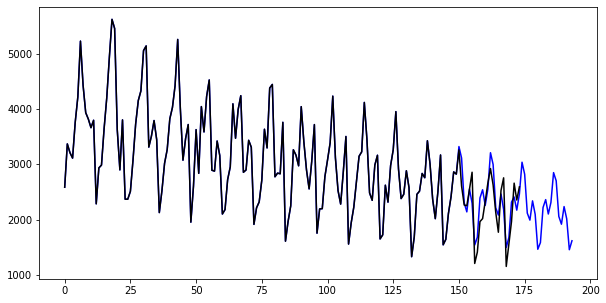

In [46]:
plt.figure(figsize = (10, 5)) 
plt.plot(SSA_stoh(F1, 50,150), 'b')
plt.plot(F, 'k')